In [15]:
import pandas as pd
import numpy as np
import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import math
import seaborn as sns
import itertools

In [16]:
def sens_and_spec(df):
    sensitivity = df['truepos'] / (df['truepos'] + df['falseneg'])
    specificity = df['trueneg'] / (df['trueneg'] + df['falsepos'])

    sensitivity[np.isnan(sensitivity)] = 0
    specificity[np.isnan(specificity)] = 0
    return(sensitivity, specificity)

def wish_mean(df):
    df_mean = df.groupby(['linear','b','d','n_samples']).mean()
    df_mean.insert(2, 'acc_std', df.groupby(['linear','b','d','n_samples'])[['accuracy']].std())
    df_mean = df_mean.reset_index()
    return(df_mean)
    

In [46]:
results_1 = pd.read_csv('wishart_experiment_1_results.csv')
results_3 = pd.read_csv('wishart_experiment_3_results.csv')
results_cross = pd.read_csv('wishart_experiment_cross_construct_impure_results.csv')
results_intra = pd.read_csv('wishart_experiment_intra_construct_impure_results.csv')
results_latent = pd.read_csv('wishart_experiment_latent_measure_impure_results.csv')

In [47]:
results_1_mean = wish_mean(results_1)

sensitivity_1, specificity_1 = sens_and_spec(results_1_mean)

results_3_mean = wish_mean(results_3)

sensitivity_3, specificity_3 = sens_and_spec(results_3_mean)

results_cross_mean = wish_mean(results_cross)

sensitivity_cross, specificity_cross = sens_and_spec(results_cross_mean)

results_intra_mean = wish_mean(results_intra)

sensitivity_intra, specificity_intra = sens_and_spec(results_intra_mean)

results_latent_mean = wish_mean(results_latent)

sensitivity_latent, specificity_latent = sens_and_spec(results_latent_mean)

In [48]:
results_1_mean

,linear,b,d,n_samples,accuracy,trueneg,acc_std,falseneg,truepos,falsepos,model_count
0,False,0.0,0.1,50,0.543333,0.63,0.294564,0.00,1.0,1.37,0.0
1,False,0.0,0.1,100,0.930000,1.79,0.197032,0.00,1.0,0.21,0.0
2,False,0.0,0.1,500,1.000000,2.00,0.000000,0.00,1.0,0.00,0.0
3,False,0.0,0.1,1000,1.000000,2.00,0.000000,0.00,1.0,0.00,0.0
4,False,0.0,0.2,50,0.730000,1.19,0.316742,0.00,1.0,0.81,0.0
5,False,0.0,0.2,100,0.983333,1.95,0.099098,0.00,1.0,0.05,0.0
6,False,0.0,0.2,500,1.000000,2.00,0.000000,0.00,1.0,0.00,0.0
7,False,0.0,0.2,1000,1.000000,2.00,0.000000,0.00,1.0,0.00,0.0
8,False,0.1,0.1,50,0.443333,0.33,0.237150,0.00,1.0,1.67,0.0
9,False,0.1,0.1,100,0.803333,1.41,0.292422,0.00,1.0,0.59,0.0


In [49]:
results_3_mean

,linear,b,d,n_samples,accuracy,trueneg,acc_std,falseneg,truepos,falsepos,model_count
0,False,0.0,0.1,50,0.996667,0.0,0.033333,0.01,2.99,0.00,0.0
1,False,0.0,0.1,100,0.996667,0.0,0.033333,0.01,2.99,0.00,0.0
2,False,0.0,0.1,500,0.980000,0.0,0.092599,0.06,2.94,0.00,0.0
3,False,0.0,0.1,1000,0.986667,0.0,0.065649,0.04,2.96,0.00,0.0
4,False,0.0,0.2,50,0.996667,0.0,0.033333,0.01,2.99,0.00,0.0
5,False,0.0,0.2,100,0.983333,0.0,0.087039,0.05,2.95,0.00,0.0
6,False,0.0,0.2,500,0.983333,0.0,0.073014,0.05,2.95,0.00,0.0
7,False,0.0,0.2,1000,0.956667,0.0,0.139383,0.13,2.87,0.00,0.0
8,False,0.1,0.1,50,1.000000,0.0,0.000000,0.00,3.00,0.00,0.0
9,False,0.1,0.1,100,0.983333,0.0,0.087039,0.05,2.95,0.00,0.0


In [50]:
results_cross_mean

,linear,b,d,n_samples,accuracy,trueneg,acc_std,falseneg,truepos,falsepos,model_count
0,False,0.0,0.1,50,0.090000,0.27,0.194509,0.00,0.0,2.73,0.0
1,False,0.0,0.1,100,0.343333,1.03,0.297596,0.00,0.0,1.97,0.0
2,False,0.0,0.1,500,0.683333,2.05,0.128664,0.00,0.0,0.95,0.0
3,False,0.0,0.1,1000,0.803333,2.41,0.164770,0.00,0.0,0.59,0.0
4,False,0.0,0.2,50,0.140000,0.42,0.242416,0.00,0.0,2.58,0.0
5,False,0.0,0.2,100,0.333333,1.00,0.303367,0.00,0.0,2.00,0.0
6,False,0.0,0.2,500,0.640000,1.92,0.193497,0.00,0.0,1.08,0.0
7,False,0.0,0.2,1000,0.663333,1.99,0.229649,0.00,0.0,1.01,0.0
8,False,0.1,0.1,50,0.040000,0.12,0.108866,0.00,0.0,2.88,0.0
9,False,0.1,0.1,100,0.273333,0.82,0.289665,0.00,0.0,2.18,0.0


In [51]:
results_intra_mean

,linear,b,d,n_samples,accuracy,trueneg,acc_std,falseneg,truepos,falsepos,model_count
0,False,0.0,0.1,50,0.360000,0.08,0.122452,0.00,1.00,1.92,0.0
1,False,0.0,0.1,100,0.516667,0.55,0.285744,0.00,1.00,1.45,0.0
2,False,0.0,0.1,500,0.853333,1.58,0.260880,0.02,0.98,0.42,0.0
3,False,0.0,0.1,1000,0.913333,1.78,0.215140,0.04,0.96,0.22,0.0
4,False,0.0,0.2,50,0.353333,0.06,0.092599,0.00,1.00,1.94,0.0
5,False,0.0,0.2,100,0.466667,0.40,0.236890,0.00,1.00,1.60,0.0
6,False,0.0,0.2,500,0.780000,1.43,0.292901,0.09,0.91,0.57,0.0
7,False,0.0,0.2,1000,0.830000,1.69,0.270075,0.20,0.80,0.31,0.0
8,False,0.1,0.1,50,0.360000,0.08,0.112915,0.00,1.00,1.92,0.0
9,False,0.1,0.1,100,0.490000,0.47,0.265718,0.00,1.00,1.53,0.0


In [52]:
results_latent_mean

,linear,b,d,n_samples,accuracy,trueneg,acc_std,falseneg,truepos,falsepos,model_count
0,False,0.0,0.1,50,0.565333,3.48,0.212405,0.00,5.00,6.52,0.0
1,False,0.0,0.1,100,0.827333,7.42,0.176025,0.01,4.99,2.58,0.0
2,False,0.0,0.1,500,0.997333,9.97,0.013130,0.01,4.99,0.03,0.0
3,False,0.0,0.1,1000,1.000000,10.00,0.000000,0.00,5.00,0.00,0.0
4,False,0.0,0.2,50,0.669333,5.04,0.229950,0.00,5.00,4.96,0.0
5,False,0.0,0.2,100,0.926000,8.89,0.127444,0.00,5.00,1.11,0.0
6,False,0.0,0.2,500,0.998667,10.00,0.009380,0.02,4.98,0.00,0.0
7,False,0.0,0.2,1000,0.999333,10.00,0.006667,0.01,4.99,0.00,0.0
8,False,0.1,0.1,50,0.418667,1.28,0.128561,0.00,5.00,8.72,0.0
9,False,0.1,0.1,100,0.706000,5.61,0.207187,0.02,4.98,4.39,0.0


In [6]:
def plot_nsamples_sns(df):
    fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=(8,8))
    #fig.subplots_adjust(hspace = 1.2, wspace=1.2)

    axs = axs.ravel()

    for n, samples in enumerate(df['n_samples'].unique()):
        new_df = df[df['n_samples'] == samples]
        sens, spec = sens_and_spec(new_df)

        sns.scatterplot(x=spec, y=sens, ax=axs[n])
        axs[n].set_title('Sample size {}'.format(samples))
        axs[n].set(xlabel = 'Specificity', ylabel = 'Sensitivity')
        axs[n].set_xlim([-0.05,1.05])
        axs[n].set_ylim([-0.05,1.05])

        plt.xlabel('Specificity')
        plt.ylabel('Sensitivity')
    
    plt.title('KME')

    
    plt.style.use('fivethirtyeight')

    plt.show

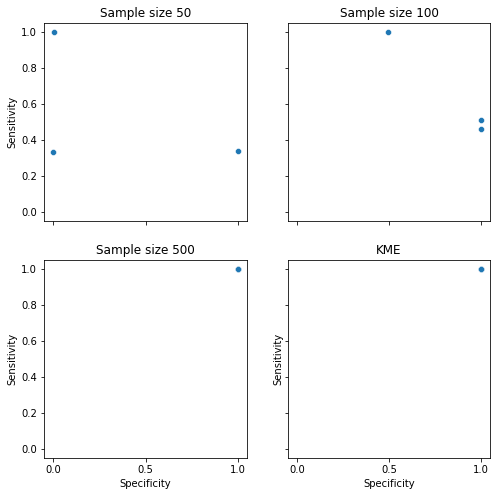

In [7]:
plot_nsamples_sns(results_1_mean)